# **Daily Challenge**

# **Data import and cleaning**

In [11]:
import pandas as pd
data=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [13]:
#remove column Time
data.drop('Time', axis=1, inplace=True)
data.drop('Flight #', axis=1, inplace=True)
data['Location']=data['Location'].fillna('unknown')
data['Route']=data['Route'].fillna('unknown')
data['AC Type']=data['AC Type'].fillna('unknown')
data['Registration']=data['Registration'].fillna('unknown')
data['cn/ln']=data['cn/ln'].fillna('unknown')
data['Summary']=data['Summary'].fillna('unknown')

meanaboard=data['Aboard'].mean()
data['Aboard']=data['Aboard'].fillna(meanaboard)

meanAboardPassangers=data['Aboard Passangers'].mean()
data['Aboard Passangers']=data['Aboard Passangers'].fillna(meanAboardPassangers)

meanAboardCrew=data['Aboard Crew'].mean()
data['Aboard Crew']=data['Aboard Crew'].fillna(meanAboardCrew)

data['Fatalities']=data['Fatalities'].fillna(0)

data['Fatalities Passangers']=data['Fatalities Passangers'].fillna(0)

data['Fatalities Crew']=data['Fatalities Crew'].fillna(0)

data['Ground']=data['Ground'].fillna(0)

#convert Aboard to integer
data['Aboard']=data['Aboard'].astype(int)
data['Aboard Passangers']=data['Aboard Passangers'].astype(int)
data['Aboard Crew']=data['Aboard Crew'].astype(int)
data['Fatalities']=data['Fatalities'].astype(int)
data['Fatalities Passangers']=data['Fatalities Passangers'].astype(int)
data['Fatalities Crew']=data['Fatalities Crew'].astype(int)
data['Ground']=data['Ground'].astype(int)


data['Date'] = pd.to_datetime(data['Date'])
data['Date']=data['Date'].dt.strftime('%Y-%m-%d')

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   4998 non-null   object
 1   Location               4998 non-null   object
 2   Operator               4988 non-null   object
 3   Route                  4998 non-null   object
 4   AC Type                4998 non-null   object
 5   Registration           4998 non-null   object
 6   cn/ln                  4998 non-null   object
 7   Aboard                 4998 non-null   int64 
 8   Aboard Passangers      4998 non-null   int64 
 9   Aboard Crew            4998 non-null   int64 
 10  Fatalities             4998 non-null   int64 
 11  Fatalities Passangers  4998 non-null   int64 
 12  Fatalities Crew        4998 non-null   int64 
 13  Ground                 4998 non-null   int64 
 14  Summary                4998 non-null   object
dtypes: int64(7), object(8

# **Exploratory Data Analysis**

In [36]:
#Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates
import pandas as pd
sum_of_crashes=data['Date'].count()
sum_of_fatalities=data['Fatalities'].sum()
sum_of_survival=data['Aboard'].sum()-data['Fatalities'].sum()


survivalrate = (sum_of_survival / data['Aboard'].sum()) * 100
fatalityrate = (sum_of_fatalities / data['Aboard'].sum()) * 100

print('The number of crashes is:', sum_of_crashes)
print('The number of fatalities is:', sum_of_fatalities)
print('The survival rate is:', survivalrate, '%')
print('The fatality rate is:', fatalityrate, '%')

The number of crashes is: 4998
The number of fatalities is: 111644
The survival rate is: 28.393858152571287 %
The fatality rate is: 71.6061418474287 %


Year
1945    74
1946    88
1947    82
1948    77
1949    67
1950    69
1951    75
1952    65
1953    69
1954    61
1957    66
1958    68
1959    66
1960    70
1962    77
1963    61
1965    62
1968    65
1969    69
1970    73
1972    77
1973    64
1977    63
1979    60
1988    64
1989    83
1990    61
1991    69
1992    66
1994    74
1995    60
1996    68
1999    62
2000    63
2003    62
Name: Date, dtype: int64


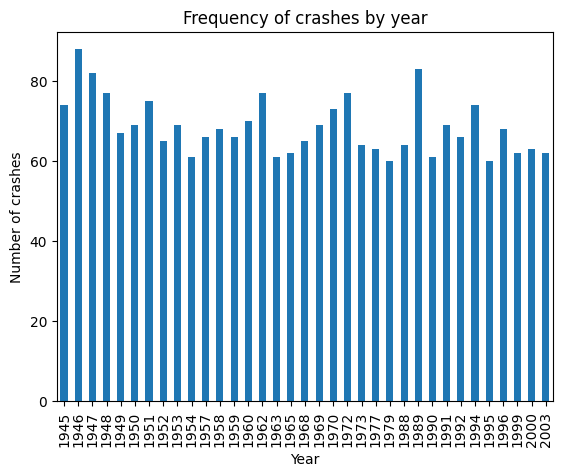

In [15]:
#group by year
data['Year']=data['Date'].str[:4]
frequency_of_crashes_by_year=data.groupby('Year')['Date'].count()

#order by most frecuency years
frequency_of_crashes_by_year=frequency_of_crashes_by_year.sort_values(ascending=False)
#take only the first 35
frequency_of_crashes_by_year=frequency_of_crashes_by_year.head(35)
#sort them by year
frequency_of_crashes_by_year=frequency_of_crashes_by_year.sort_index()
print(frequency_of_crashes_by_year)

#graph
import matplotlib.pyplot as plt
frequency_of_crashes_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of crashes')
plt.title('Frequency of crashes by year')
plt.show()

# **Statistical Analysis**

In [16]:
import scipy
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind

mean_scipy = stats.tmean(data['Fatalities Passangers'])
median_scipy = np.median(data['Fatalities Passangers'])
variance_scipy = stats.tvar(data['Fatalities Passangers'])
std_dev_scipy = stats.tstd(data['Fatalities Passangers'])
print("Mean:", mean_scipy)
print("Median:", median_scipy)
print("Variance:", variance_scipy)
print("Standard Deviation:", std_dev_scipy)

#array with fatalities in last year
fatalities_2023=data[data['Year']=='2023']['Fatalities']
fatalities_2020=data[data['Year']=='2020']['Fatalities']

mean_fatalities_2023 = np.mean(fatalities_2023)
mean_fatalities_2020 = np.mean(fatalities_2020)

t_stat,p_val= ttest_ind(fatalities_2023, fatalities_2020)
print("t-statistic:", t_stat)
print("p-value:", p_val)

Mean: 18.1312525010004
Median: 7.0
Variance: 1126.2225131797766
Standard Deviation: 33.5592388647266
t-statistic: -0.5714496959126121
p-value: 0.580310839331889


# **Visualization**

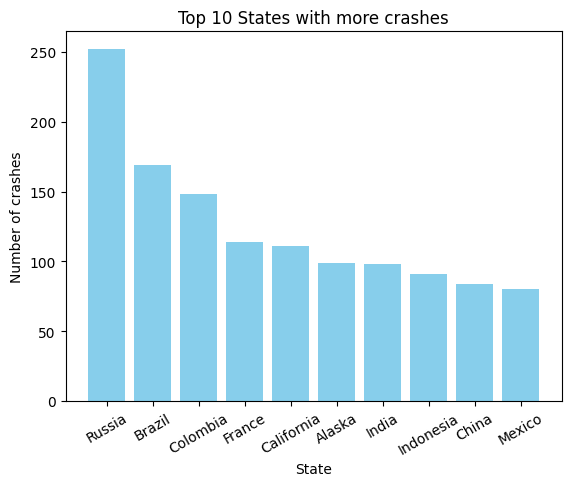

In [25]:
location_split = data['Location'].str.split(',', expand=True)
data['Region'] = location_split[0]
data['State'] = location_split[1].str.strip()
data.head()

#bar charts of crashes by region
import matplotlib.pyplot as plt
crashes_by_State=data.groupby('State')['Date'].count().reset_index()
crashes_by_State=crashes_by_State.sort_values(by=['Date'], ascending=False)
top_10_states = crashes_by_State.head(10)

plt.bar(top_10_states['State'], top_10_states['Date'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of crashes')
plt.title('Top 10 States with more crashes')
#rotation
plt.xticks(rotation=30)
plt.show()




# Russia has the most air accidents, largely due to weather-related issues like ice and low visibility.
# 1946 and 1989 stand out as years with the highest number of accidents, including several disappearances, potentially due to the lack of technology like GPS and modern navigation systems.
# The fatality rate in airplane crashes is generally much higher than the survival rate, which is often due to the size and impact force of the aircraft.

By analyzing the countries with the highest number of aviation accidents, we observe that Russia has the highest number of accidents, with many of them being attributed to adverse weather conditions, including ice and poor visibility. Regarding accident frequency, we notice that the years with the highest number of incidents are 1946 and 1989. These years stand out as several disappearances were recorded, which could be linked to the limited technological capabilities at the time, such as GPS and other navigational aids. The lack of advanced technology and safety systems likely contributed to these tragic events.

Additionally, we observe that the percentage of fatalities is consistently much higher than the number of survivors, which can be explained by the size, speed, and impact force of the aircraft. The magnitude of an airplane crash, particularly in earlier years with less advanced safety measures, often results in a significantly higher fatality rate.